In [27]:
import pandas as pd
from eia import EnergyDemand, TransportationDemand
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
API = ""
YEAR = 2050
MIN_MAX_YEAR = 2035

SCENARIOS = {
    "reference": "Reference",
    # "aeo2022": "AEO2022",  
    "no_ira": "No IRA",  
    "low_ira": "Low IRA", 
    "high_ira": "High IRA",
    "high_growth": "High Economic Growth", 
    "low_growth": "Low Economic Growth", 
    "high_oil_price": "High Oil Price", 
    "low_oil_price": "Low Oil Price", 
    "high_oil_gas_supply": "High Oil and Gas Supply", 
    "low_oil_gas_supply": "Low Oil and Gas Supply", 
    "high_ztc": "High Zero-Carbon Technology Cost", 
    "low_ztc": "Low Zero-Carbon Technology Cost", 
    "high_growth_high_ztc": " High Economic Growth-High Zero-Carbon Technology Cost",
    "high_growth_low_ztc": "High Economic Growth-Low Zero-Carbon Technology Cost", 
    "low_growth_high_ztc": "Low Economic Growth-High Zero-Carbon Technology Cost", 
    "low_growth_low_ztc": "Low Economic Growth-Low Zero-Carbon Technology Cost",  
    "fast_build_high_lng": "Fast Builds Plus High LNG Price",  
    "high_lng": "High LNG Price",  
    "low_lng": "Low LNG Price",  
}

VEHICLE_CODES = {
    "light_duty": "kei_trv_trn_NA_ldv_NA_NA_blnvehmls",
    "med_duty": "kei_trv_trn_NA_cml_NA_NA_blnvehmls",
    "heavy_duty": "kei_trv_trn_NA_fght_NA_NA_blnvehmls",
    "bus": "_trv_trn_NA_bst_NA_NA_bpm",
    "rail_passenger": "_trv_trn_NA_rlp_NA_NA_bpm",
    "boat_shipping": "kei_trv_trn_NA_dmt_NA_NA_blntnmls",
    "rail_shipping": "kei_trv_trn_NA_rail_NA_NA_blntnmls",
    "air": "kei_trv_trn_NA_air_NA_NA_blnseatmls",
}

In [29]:
def collect_energy_data(sector: str, year: int, api: str) -> pd.DataFrame:
    """Gets AEO data."""
    df = pd.DataFrame()
    for scenario in SCENARIOS:
        temp = EnergyDemand(sector, year, api, scenario).get_data()
        temp = temp.rename(columns={"value":scenario})
        if df.empty:
            df = temp[scenario].to_frame()
        else:
            df = df.join(temp[scenario].to_frame())
            
    return df.rename(columns=SCENARIOS)

In [30]:
def collect_transport_data(vehicle: str, year: int, api: str) -> pd.DataFrame:
    """Gets AEO data."""
    df = pd.DataFrame()
    for scenario in SCENARIOS:
        temp = TransportationDemand(vehicle, year, api, "travel", scenario).get_data()
        temp = temp.rename(columns={"value":scenario})
        if df.empty:
            df = temp[scenario].to_frame()
        else:
            df = df.join(temp[scenario].to_frame())
            
    return df.rename(columns=SCENARIOS)

In [31]:
def calculate_difference(df: pd.DataFrame, min_max_before: int | None = None) -> pd.DataFrame:
    """Gets data as percent difference from Reference scenario."""

    diff = df.copy()

    for col in df:
        diff[col] = ((df[col] - df["Reference"]) / df["Reference"] * 100)
    
    if min_max_before:
        min_diff = round(diff.loc[:min_max_before].min().min(),2)
        max_diff = round(diff.loc[:min_max_before].max().max(),2)
        
        print(f"The minimum differencce before {min_max_before} is: {min_diff} %")
        print(f"The maximum differencce before {min_max_before} is: {max_diff} %")
    
    return diff

In [32]:
def plot_difference(df: pd.DataFrame, title: str | None = None) -> tuple[plt.Figure, plt.axes]:

    fig, axs = plt.subplots(1,1, figsize=(8, 5))

    colors = sns.color_palette("tab10", n_colors=len(SCENARIOS))  # or "Set2", "Paired", etc.
    axs.set_prop_cycle("color", colors)

    df.plot(ylabel="Percent Difference from Reference (%)", xlabel="", ax=axs)
    axs.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
    
    if title:
        axs.set_title(title)

    return fig, axs

The minimum differencce before 2035 is: -2.79 %
The maximum differencce before 2035 is: 1.23 %


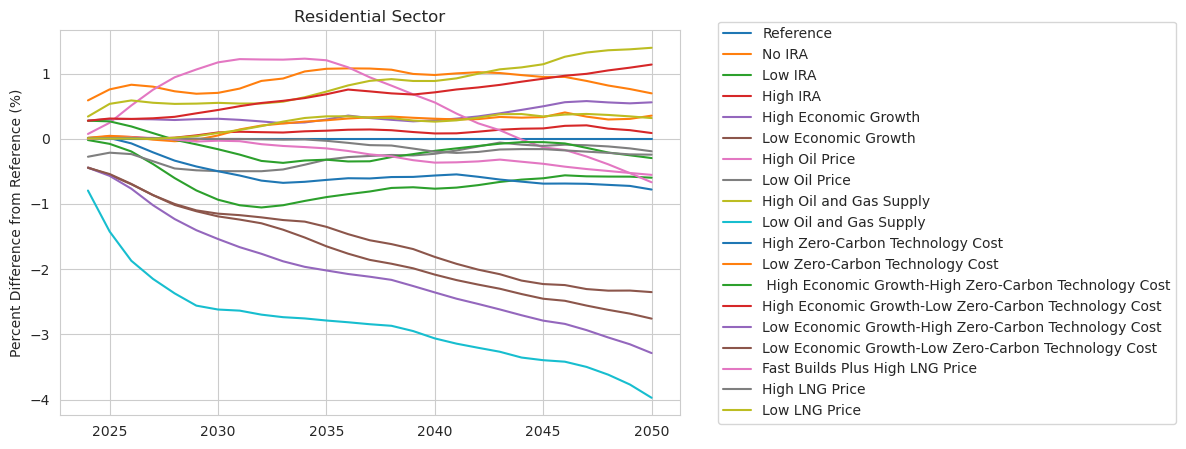

In [33]:
res = collect_energy_data("residential", YEAR, API)
res_diff = calculate_difference(res, MIN_MAX_YEAR)
fig, ax = plot_difference(res_diff, title="Residential Sector")

The minimum differencce before 2035 is: -3.07 %
The maximum differencce before 2035 is: 0.91 %


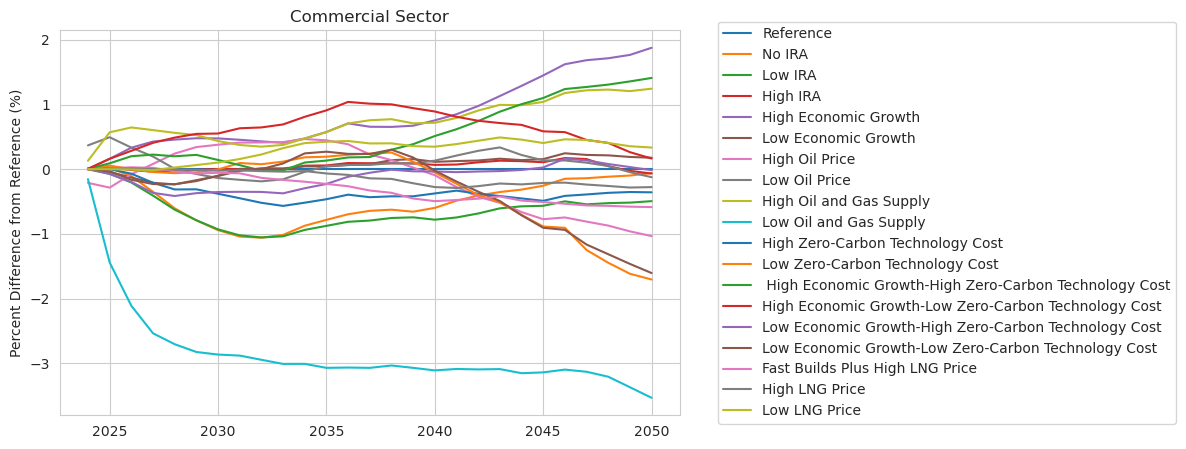

In [34]:
com = collect_energy_data("commercial", YEAR, API)
com_diff = calculate_difference(com, MIN_MAX_YEAR)
fig, ax = plot_difference(com_diff, title="Commercial Sector")

The minimum differencce before 2035 is: -8.8 %
The maximum differencce before 2035 is: 10.06 %


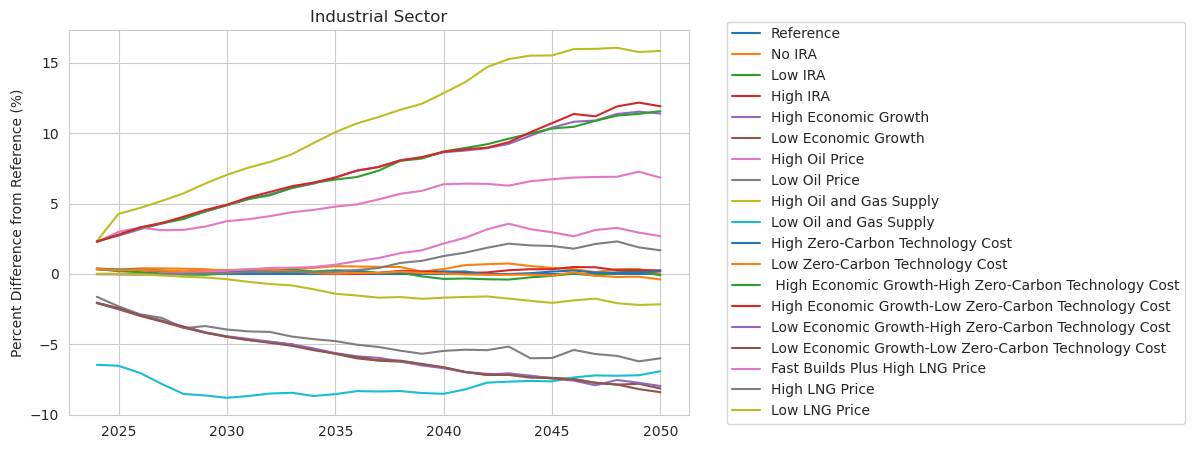

In [35]:
ind = collect_energy_data("industry", YEAR, API)
ind_diff = calculate_difference(ind, MIN_MAX_YEAR)
fig, ax = plot_difference(ind_diff, title="Industrial Sector")

The minimum differencce before 2035 is: -5.18 %
The maximum differencce before 2035 is: 6.65 %


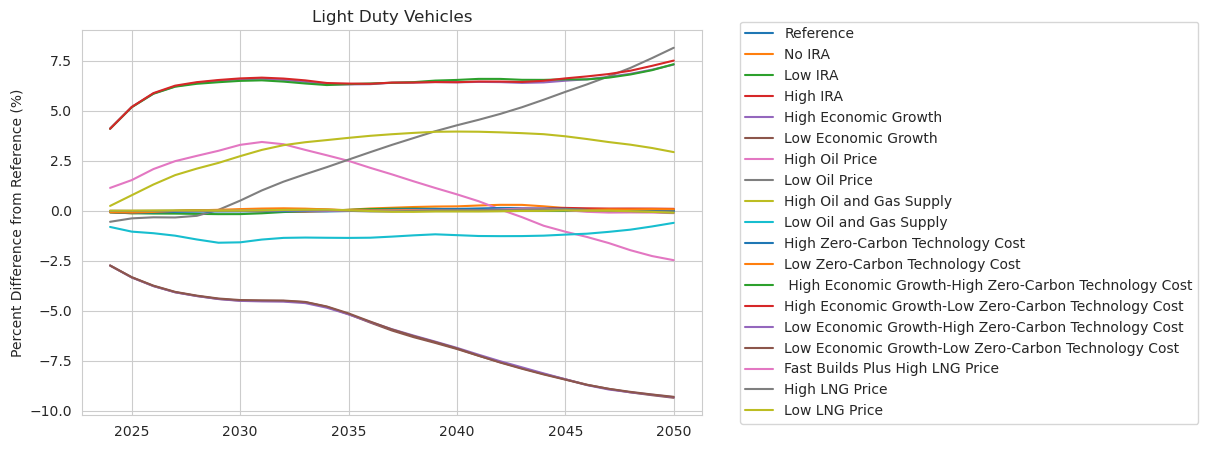

In [36]:
veh = collect_transport_data("light_duty", YEAR, API)
veh_diff = calculate_difference(veh, MIN_MAX_YEAR)
fig, ax = plot_difference(veh_diff, title="Light Duty Vehicles")

The minimum differencce before 2035 is: -8.08 %
The maximum differencce before 2035 is: 8.77 %


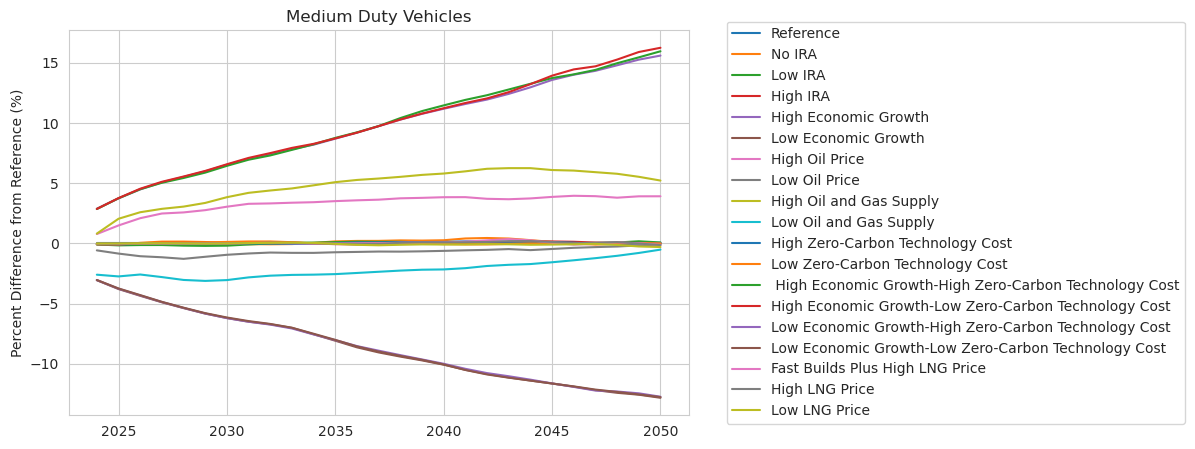

In [37]:
veh = collect_transport_data("med_duty", YEAR, API)
veh_diff = calculate_difference(veh, MIN_MAX_YEAR)
fig, ax = plot_difference(veh_diff, title="Medium Duty Vehicles")

The minimum differencce before 2035 is: -8.18 %
The maximum differencce before 2035 is: 10.07 %


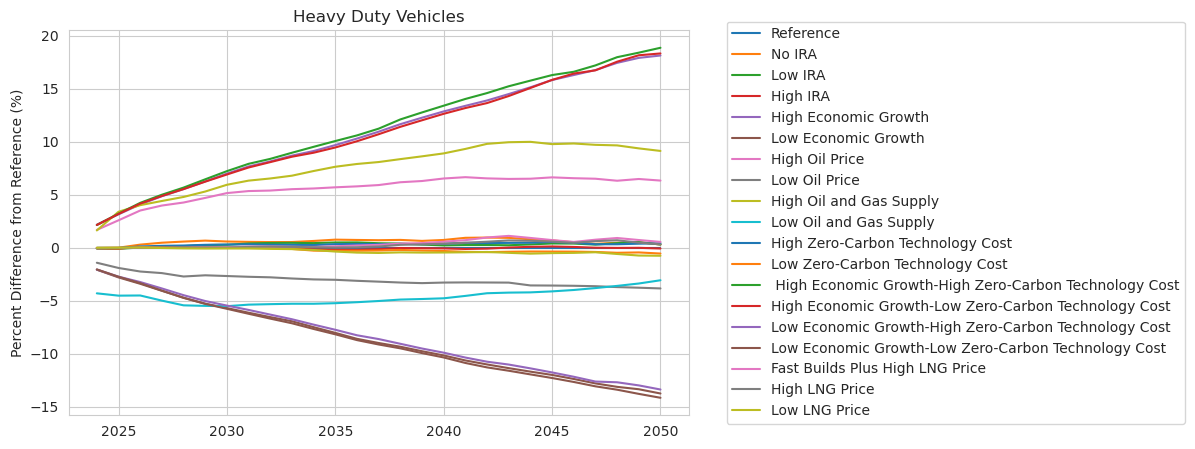

In [38]:
veh = collect_transport_data("heavy_duty", YEAR, API)
veh_diff = calculate_difference(veh, MIN_MAX_YEAR)
fig, ax = plot_difference(veh_diff, title="Heavy Duty Vehicles")

The minimum differencce before 2035 is: -1.97 %
The maximum differencce before 2035 is: 3.03 %


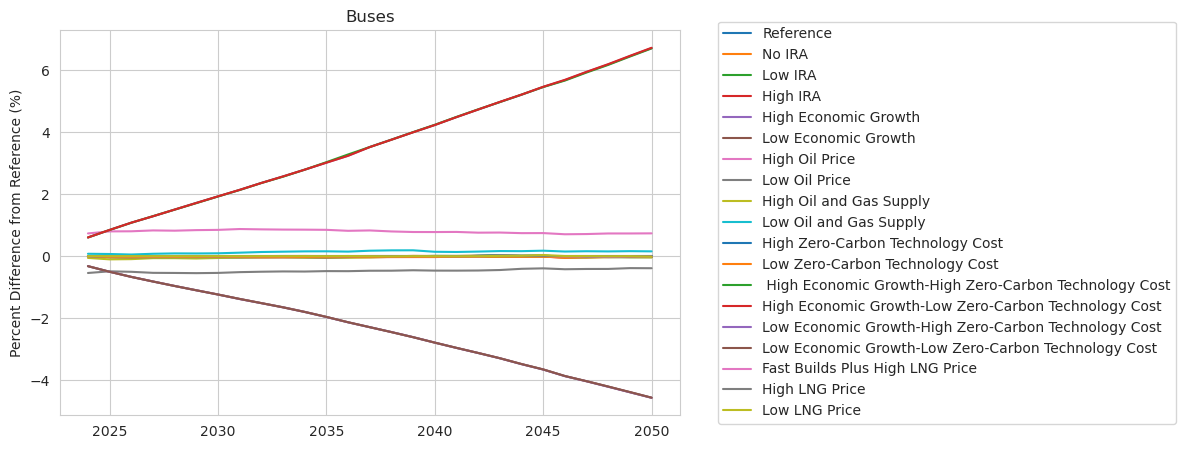

In [39]:
veh = collect_transport_data("bus", YEAR, API)
veh_diff = calculate_difference(veh, MIN_MAX_YEAR)
fig, ax = plot_difference(veh_diff, title="Buses")

The minimum differencce before 2035 is: -8.29 %
The maximum differencce before 2035 is: 12.94 %


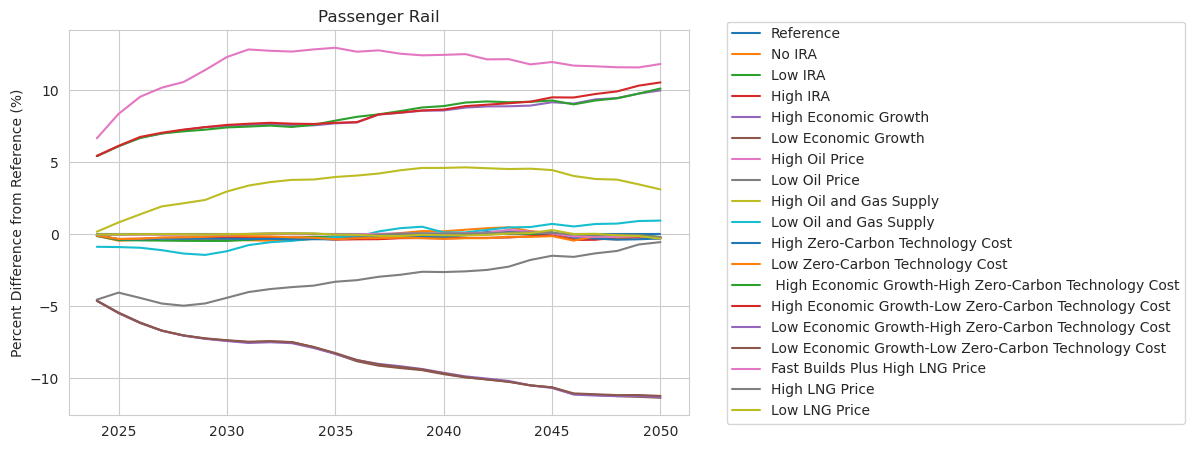

In [40]:
veh = collect_transport_data("rail_passenger", YEAR, API)
veh_diff = calculate_difference(veh, MIN_MAX_YEAR)
fig, ax = plot_difference(veh_diff, title="Passenger Rail")

The minimum differencce before 2035 is: -7.32 %
The maximum differencce before 2035 is: 9.02 %


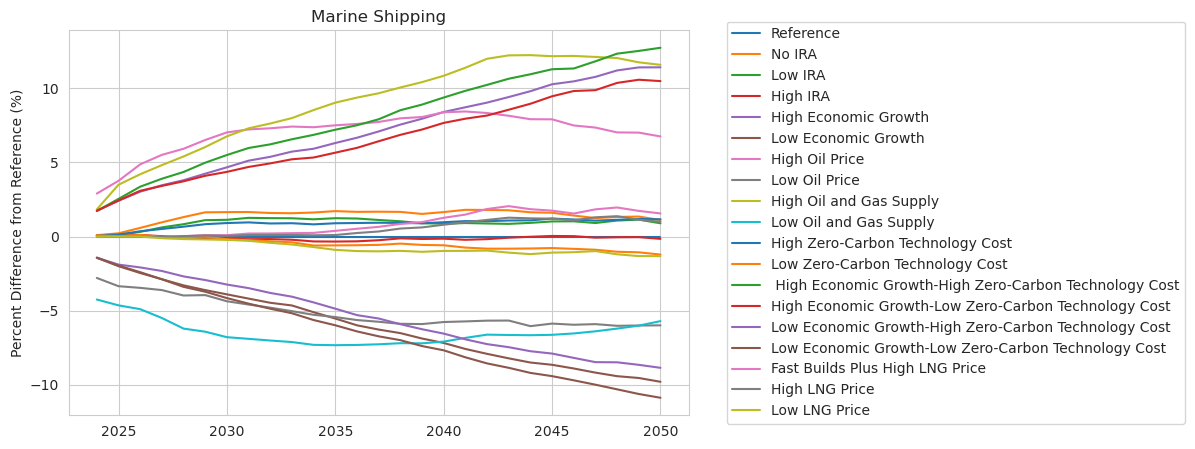

In [41]:
veh = collect_transport_data("boat_shipping", YEAR, API)
veh_diff = calculate_difference(veh, MIN_MAX_YEAR)
fig, ax = plot_difference(veh_diff, title="Marine Shipping")

The minimum differencce before 2035 is: -11.0 %
The maximum differencce before 2035 is: 15.55 %


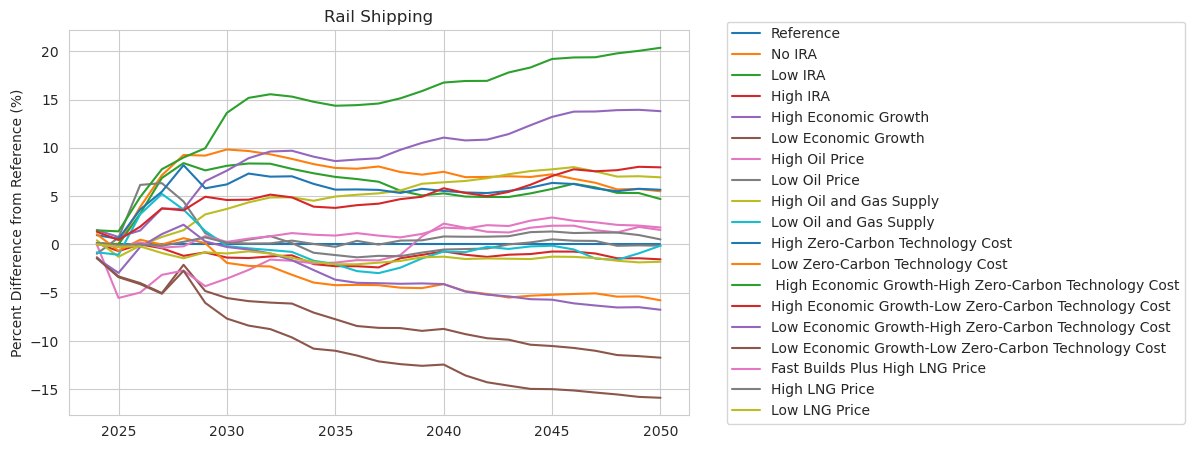

In [42]:
veh = collect_transport_data("rail_shipping", YEAR, API)
veh_diff = calculate_difference(veh, MIN_MAX_YEAR)
fig, ax = plot_difference(veh_diff, title="Rail Shipping")

The minimum differencce before 2035 is: -7.46 %
The maximum differencce before 2035 is: 8.12 %


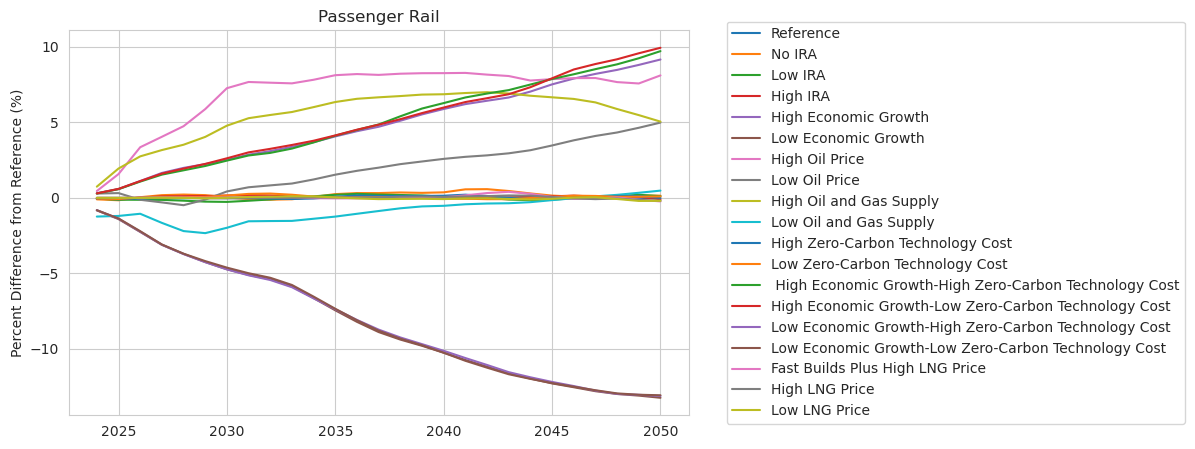

In [43]:
veh = collect_transport_data("air", YEAR, API)
veh_diff = calculate_difference(veh, MIN_MAX_YEAR)
fig, ax = plot_difference(veh_diff, title="Passenger Rail")